## Visualize the results of the KS-test

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

In [2]:
output_fig_dir <- "figures/Plate2"

ks_test_fig <- file.path(output_fig_dir, "ks_test_cellprofileric_cellpose_genotype.png")
er_distrib_fig <- file.path(output_fig_dir, "cellprofileric_cellpose_top_er_feature_distrib.png")

In [3]:
# Load and process KS-test data
ks_file <- file.path("data", "Plate2", "nf1_cellprofileric_cellpose_kstest_results.csv")
ks_df <- readr::read_csv(ks_file, col_types = readr::cols(.default="d", Features="c"))

# Create a new column for a directional ks-test statistic
# Arrange by statistic
# Split out components of feature name for visualization
ks_df <- ks_df %>%
    dplyr::mutate(signed_statistic = statistic * statistic_sign) %>%
    dplyr::arrange(desc(statistic)) %>%
    tidyr::separate(
        Features,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

# Clean channel for visualization
ks_df$channel_cleaned <-
    dplyr::recode(
        ks_df$channel_cleaned,
        "DAPI" = "nuclei",
        "RFP" = "actin",
        "GFP" = "ER",
        .default = "other",
        .missing="other"
    )

print(dim(ks_df))
head(ks_df, 10)

Warning message:
“Expected 6 pieces. Additional pieces discarded in 468 rows [13, 14, 15, 16, 18,
19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 37, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 728 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 17, 20, 28, 35, 36, 40, 44, 45, ...].”


[1] 1196   13


Features,compartment,feature_group,measurement,channel,parameter1,parameter2,statistic,pvalue,statistic_location,statistic_sign,signed_statistic,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Cells_Correlation_Costes_GFP_RFP,Cells,Correlation,Costes,GFP,RFP,NA,0.6349354,4.645285e-162,0.3739562,1,0.6349354,ER
Cytoplasm_Correlation_Costes_GFP_RFP,Cytoplasm,Correlation,Costes,GFP,RFP,NA,0.6325904,9.254061e-161,0.4051746,1,0.6325904,ER
Cells_Granularity_1_GFP,Cells,Granularity,1,GFP,NA,NA,0.4504627,1.836175e-78,0.2300607,-1,-0.4504627,ER
Cytoplasm_Granularity_1_GFP,Cytoplasm,Granularity,1,GFP,NA,NA,0.4367850,1.259284e-73,0.3302872,-1,-0.4367850,ER
Nuclei_RadialDistribution_MeanFrac_DAPI_4of4,Nuclei,RadialDistribution,MeanFrac,DAPI,4of4,NA,0.4291035,5.416888e-71,0.4037195,-1,-0.4291035,nuclei
Cells_AreaShape_Area,Cells,AreaShape,Area,NA,NA,NA,0.4290982,5.510354e-71,0.2239876,-1,-0.4290982,other
Cells_AreaShape_EquivalentDiameter,Cells,AreaShape,EquivalentDiameter,NA,NA,NA,0.4290982,5.510354e-71,0.3480103,-1,-0.4290982,other
Cytoplasm_AreaShape_Area,Cytoplasm,AreaShape,Area,NA,NA,NA,0.4275611,1.831993e-70,0.2004272,-1,-0.4275611,other
Cytoplasm_AreaShape_EquivalentDiameter,Cytoplasm,AreaShape,EquivalentDiameter,NA,NA,NA,0.4275611,1.831993e-70,0.3359375,-1,-0.4275611,other


In [4]:
# Load feature data
data_dir <-file.path("..", "..", "..", "4_processing_features", "data", "Plate2", "CellProfiler")
cp_file <- file.path(data_dir, "nf1_sc_norm_cellprofileric_cellpose.csv.gz")

cp_df <- readr::read_csv(
    cp_file,
    col_types = readr::cols(
        .default="d",
        Metadata_WellRow="c",
        Metadata_WellCol="c",
        Metadata_Well="c",
        Metadata_gene_name="c",
        Metadata_genotype="c"
    )
)

print(dim(cp_df))
head(cp_df, 3)

New names:
• `` -> `...1`


[1] 1757 1209


...1,Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,⋯,Nuclei_Texture_Variance_DAPI_3_02_256,Nuclei_Texture_Variance_DAPI_3_03_256,Nuclei_Texture_Variance_GFP_3_00_256,Nuclei_Texture_Variance_GFP_3_01_256,Nuclei_Texture_Variance_GFP_3_02_256,Nuclei_Texture_Variance_GFP_3_03_256,Nuclei_Texture_Variance_RFP_3_00_256,Nuclei_Texture_Variance_RFP_3_01_256,Nuclei_Texture_Variance_RFP_3_02_256,Nuclei_Texture_Variance_RFP_3_03_256
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,A,1,54,NF1,WT,8,1,A1,1,⋯,-0.1443442,-0.1380469,0.07309059,0.03428177,0.0306807,0.009522031,-0.2337732,-0.2227027,-0.2327119,-0.2312011
1,A,1,54,NF1,WT,8,1,A1,2,⋯,-0.5785998,-0.5741400,-0.28246290,-0.26334472,-0.3074397,-0.298484248,-0.3056366,-0.3085066,-0.3082168,-0.2983295
2,A,1,54,NF1,WT,8,1,A1,3,⋯,-0.2815867,-0.2588916,-0.40991850,-0.39902244,-0.3901638,-0.407883614,-0.3652998,-0.3666808,-0.3726854,-0.3684018


## Visualize KS test

In [5]:
# Determine a bonferroni adjusted alpha value threshold
alpha <- 0.05
bon_alpha <- alpha / dim(ks_df)[1]
bon_alpha

[1] 4.180602e-05

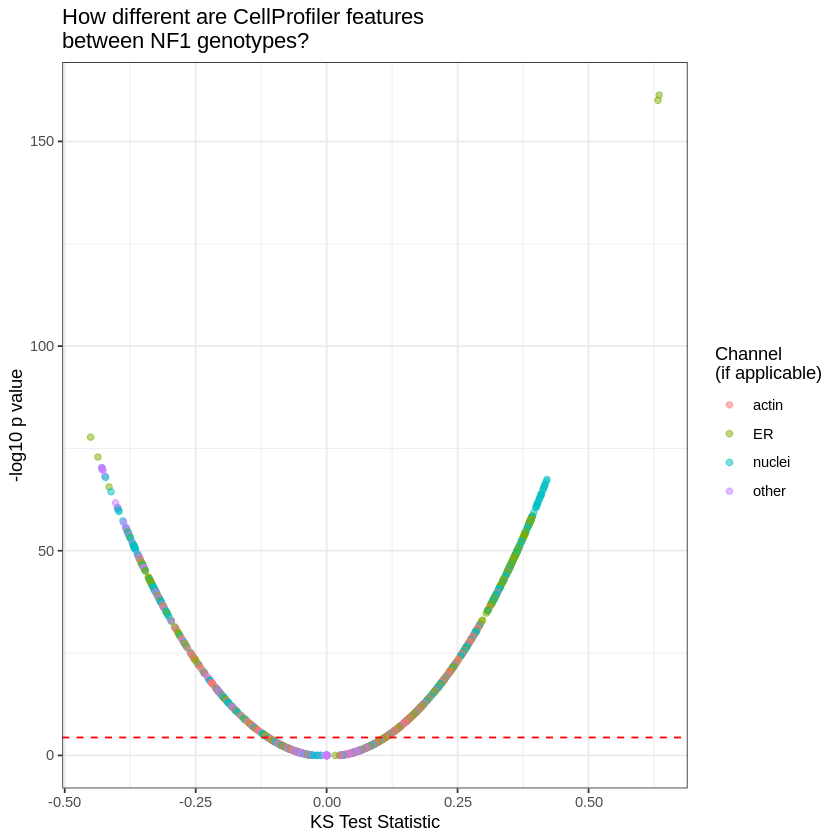

In [6]:
ks_test_gg <- (
    ggplot(ks_df, aes(x = signed_statistic, y = -log10(pvalue)))
    + geom_point(alpha = 0.5, aes(color=channel_cleaned))
    + geom_hline(yintercept=-log10(bon_alpha), linetype = "dashed", color = "red")
    + theme_bw()
    + xlab("KS Test Statistic")
    + ylab("-log10 p value")
    + ggtitle("How different are CellProfiler features\nbetween NF1 genotypes?")
    + guides(color = guide_legend(title = "Channel\n(if applicable)"))
)

ks_test_gg

In [7]:
# Output figure
ggsave(ks_test_fig, ks_test_gg, dpi = 500, height = 6, width = 6)

## Visualize distribution of top ER feature

In [8]:
top_er_feature <- ks_df %>%
    dplyr::filter(channel_cleaned == "ER") %>%
    dplyr::select(Features)

top_er_feature <- head(top_er_feature, 1) %>% dplyr::pull(Features)
top_er_feature

[1] "Cells_Correlation_Costes_GFP_RFP"

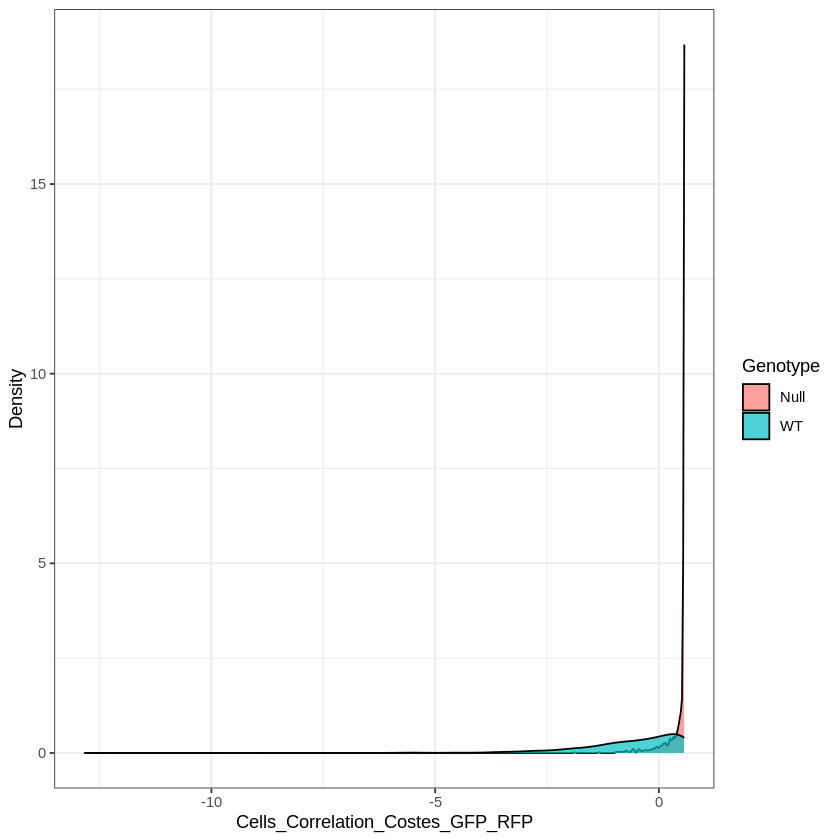

In [9]:
top_er_feature_gg = (
    ggplot(cp_df, aes(x = .data[[top_er_feature]]))
    + geom_density(aes(fill = Metadata_genotype), alpha = 0.7)
    + theme_bw()
    + ylab("Density")
    + guides(fill = guide_legend(title = "Genotype"))
)

top_er_feature_gg

In [10]:
# Output figure
ggsave(er_distrib_fig, top_er_feature_gg, dpi = 500, height = 6, width = 6)